# Importing libraries


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load data


In [2]:
kickstarter_clean_df = pd.read_csv(
    "./data/Part3.Team8.kickstarter_data_full_cleaned.csv", low_memory=False
)

# Hypothesis 6: The name and the blurb of the project will affect the success of the project


In [3]:
h6_df = kickstarter_clean_df[["blurb", "name", "SuccessfulBool"]]


In [4]:
h6_df["blurb"].fillna("", inplace=True)

C:\Users\Avidan.DESKTOP-RGG0UVA\AppData\Local\Temp\ipykernel_24168\135645008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h6_df["blurb"].fillna("", inplace=True)


### make a new column with the concatenation of blurb and name and category for vectorization


In [5]:
h6_df["concatenated_string"] = h6_df["blurb"] + " " + h6_df["name"]

C:\Users\Avidan.DESKTOP-RGG0UVA\AppData\Local\Temp\ipykernel_24168\2487157898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h6_df["concatenated_string"] = h6_df["blurb"] + " " + h6_df["name"]


### drop columns after concatenation


In [6]:
h6_df.drop(columns=["blurb", "name"], inplace=True)

C:\Users\Avidan.DESKTOP-RGG0UVA\AppData\Local\Temp\ipykernel_24168\1463000313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h6_df.drop(columns=["blurb", "name"], inplace=True)


# Split into X and y


In [7]:
X = h6_df.drop(columns="SuccessfulBool")
y = h6_df["SuccessfulBool"]


## Logistic Regression


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

blurb_train, blurb_test, y_train, y_test = train_test_split(
    X["concatenated_string"], y, test_size=0.3, random_state=42
)

vectorizer = CountVectorizer()

vectorizer.fit(blurb_train)

X_train = vectorizer.transform(blurb_train)

X_test = vectorizer.transform(blurb_test)

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

c:\Users\Avidan.DESKTOP-RGG0UVA\Desktop\Personal\final-project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

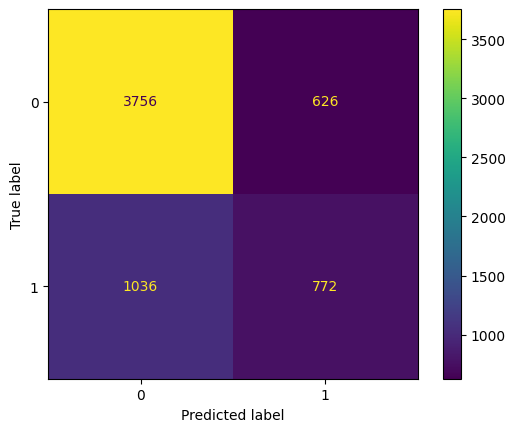

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, classifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()


In [10]:
from sklearn.metrics import classification_report

print(
    "Classification Report train:",
    classification_report(y_train, classifier.predict(X_train)),
)
print(
    "Classification Report test:",
    classification_report(y_test, classifier.predict(X_test)),
)


Classification Report train:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     10232
           1       0.98      0.94      0.96      4210

    accuracy                           0.98     14442
   macro avg       0.98      0.97      0.97     14442
weighted avg       0.98      0.98      0.98     14442

Classification Report test:               precision    recall  f1-score   support

           0       0.78      0.86      0.82      4382
           1       0.55      0.43      0.48      1808

    accuracy                           0.73      6190
   macro avg       0.67      0.64      0.65      6190
weighted avg       0.72      0.73      0.72      6190



In [11]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


In [15]:
auc(fpr, tpr)

0.7474564716680869

In [12]:
# Plot ROC curve
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        name="ROC curve (area = %0.2f)" % roc_auc,
        line=dict(color="darkorange", width=2),
        text=thresholds,
        hovertemplate="fpr: %{x:.2f}<br>tpr: %{y:.2f}<br>threshold: %{text:.2f}",
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        line=dict(color="navy", width=2, dash="dash"),
    )
)
fig.update_layout(
    width=800,
    height=800,
    title_text="ROC curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()

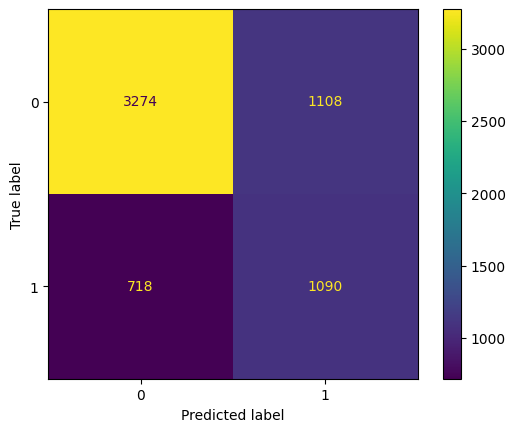

In [13]:
# threshold = 0.3
y_pred = classifier.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred > 0.3, 1, 0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [14]:
print("Classification Report threshold 0.3:", classification_report(y_test, y_pred))

Classification Report threshold 0.3:               precision    recall  f1-score   support

           0       0.82      0.75      0.78      4382
           1       0.50      0.60      0.54      1808

    accuracy                           0.71      6190
   macro avg       0.66      0.68      0.66      6190
weighted avg       0.73      0.71      0.71      6190



## Multinomial Naive Bayes


In [16]:
from sklearn.naive_bayes import MultinomialNB

blurb_train, blurb_test, y_train, y_test = train_test_split(
    X["concatenated_string"], y, test_size=0.3, random_state=42
)

vectorizer = CountVectorizer()

vectorizer.fit(blurb_train)

X_train = vectorizer.transform(blurb_train)

X_test = vectorizer.transform(blurb_test)

classifier = MultinomialNB()

classifier.fit(X_train, y_train)


MultinomialNB()

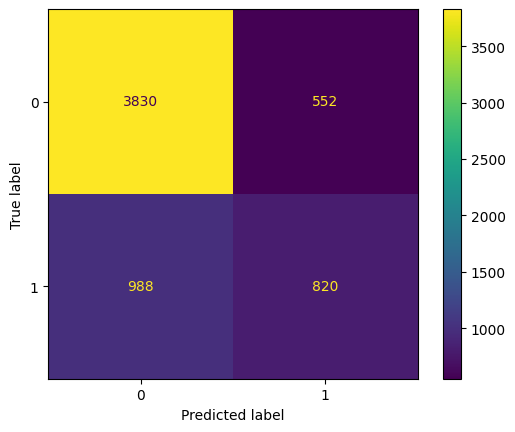

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, classifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()


In [18]:
print(
    "Classification Report train:",
    classification_report(y_train, classifier.predict(X_train)),
)
print(
    "Classification Report test:",
    classification_report(y_test, classifier.predict(X_test)),
)

Classification Report train:               precision    recall  f1-score   support

           0       0.91      0.93      0.92     10232
           1       0.81      0.77      0.79      4210

    accuracy                           0.88     14442
   macro avg       0.86      0.85      0.85     14442
weighted avg       0.88      0.88      0.88     14442

Classification Report test:               precision    recall  f1-score   support

           0       0.79      0.87      0.83      4382
           1       0.60      0.45      0.52      1808

    accuracy                           0.75      6190
   macro avg       0.70      0.66      0.67      6190
weighted avg       0.74      0.75      0.74      6190



## AUC Score

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

0.7648158016705509

## Neural Network


Epoch 1/6
452/452 [==============================] - 2s 2ms/step - loss: 0.6069 - accuracy: 0.7085 - val_loss: 0.5934 - val_accuracy: 0.7079
Epoch 2/6
452/452 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7112 - val_loss: 0.5398 - val_accuracy: 0.7200
Epoch 3/6
452/452 [==============================] - 1s 2ms/step - loss: 0.5034 - accuracy: 0.7495 - val_loss: 0.5130 - val_accuracy: 0.7465
Epoch 4/6
452/452 [==============================] - 1s 3ms/step - loss: 0.4796 - accuracy: 0.7646 - val_loss: 0.5089 - val_accuracy: 0.7504
Epoch 5/6
452/452 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7698 - val_loss: 0.5083 - val_accuracy: 0.7536
Epoch 6/6
452/452 [==============================] - 1s 2ms/step - loss: 0.4621 - accuracy: 0.7737 - val_loss: 0.5095 - val_accuracy: 0.7549


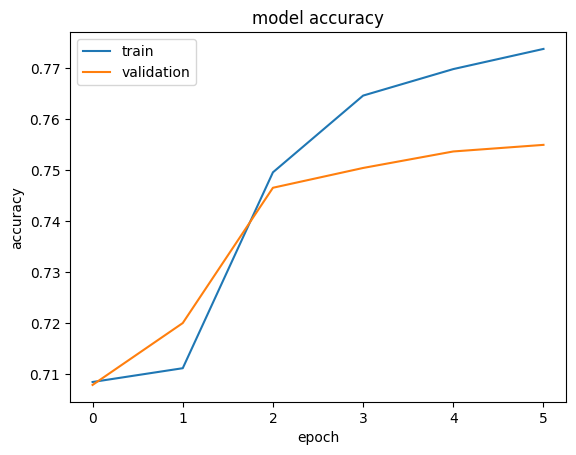

In [85]:
import tensorflow as tf

from sklearn.model_selection import train_test_split

# set seed for reproducibility
tf.random.set_seed(42)

# text classification
import tensorflow as tf

blurb_train, blurb_test, y_train, y_test = train_test_split(
    X["concatenated_string"], y, test_size=0.3, random_state=42
)

# Create a tokenizer to preprocess our text descriptions
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(blurb_train)

# Create training and validation sets using an 80-20 split
training_sequences = tokenizer.texts_to_sequences(blurb_train)
training_padded = tf.keras.preprocessing.sequence.pad_sequences(
    training_sequences, maxlen=100, padding="post", truncating="post"
)

validation_sequences = tokenizer.texts_to_sequences(blurb_test)
validation_padded = tf.keras.preprocessing.sequence.pad_sequences(
    validation_sequences, maxlen=100, padding="post", truncating="post"
)

# Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(1000, 16, input_length=100),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    training_padded, y_train, epochs=6, validation_data=(validation_padded, y_test)
)

# Plot the accuracy and loss curves
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()
